In [2]:
import urllib

!mkdir data

urls = [
    'https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/ann-test.data',
    'https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/ann-train.data'
]
# data
for url in urls:
    file_name = url.split('/')[-1]
    response = urllib.request.urlopen(url)
    with open(f"data/{file_name}", "wb") as f:
        f.write(response.read())

# columns
columns = []
response = urllib.request.urlopen(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/hypothyroid.names'
)
for line in response.readlines():
    line = line.decode('utf-8')
    if ':' in line:
        columns.append(line.split(':')[0])

mkdir: data: File exists


In [3]:
import pandas as pd
test = pd.read_csv(
    'data/ann-test.data', 
    sep="\s+",
    header=None,
    # names=columns
)

train = pd.read_csv(
    'data/ann-train.data', 
    sep="\s+",
    header=None,
    # names=columns
)
X = pd.concat([train, test])
y = X.iloc[:, -1]
X = X.drop(21, axis=1)

In [4]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.73,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0.00060,0.015,0.120,0.082,0.146,3
1,0.24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.030,0.143,0.133,0.108,3
2,0.47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00190,0.024,0.102,0.131,0.078,3
3,0.64,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00090,0.017,0.077,0.090,0.085,3
4,0.23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.026,0.139,0.090,0.153,3


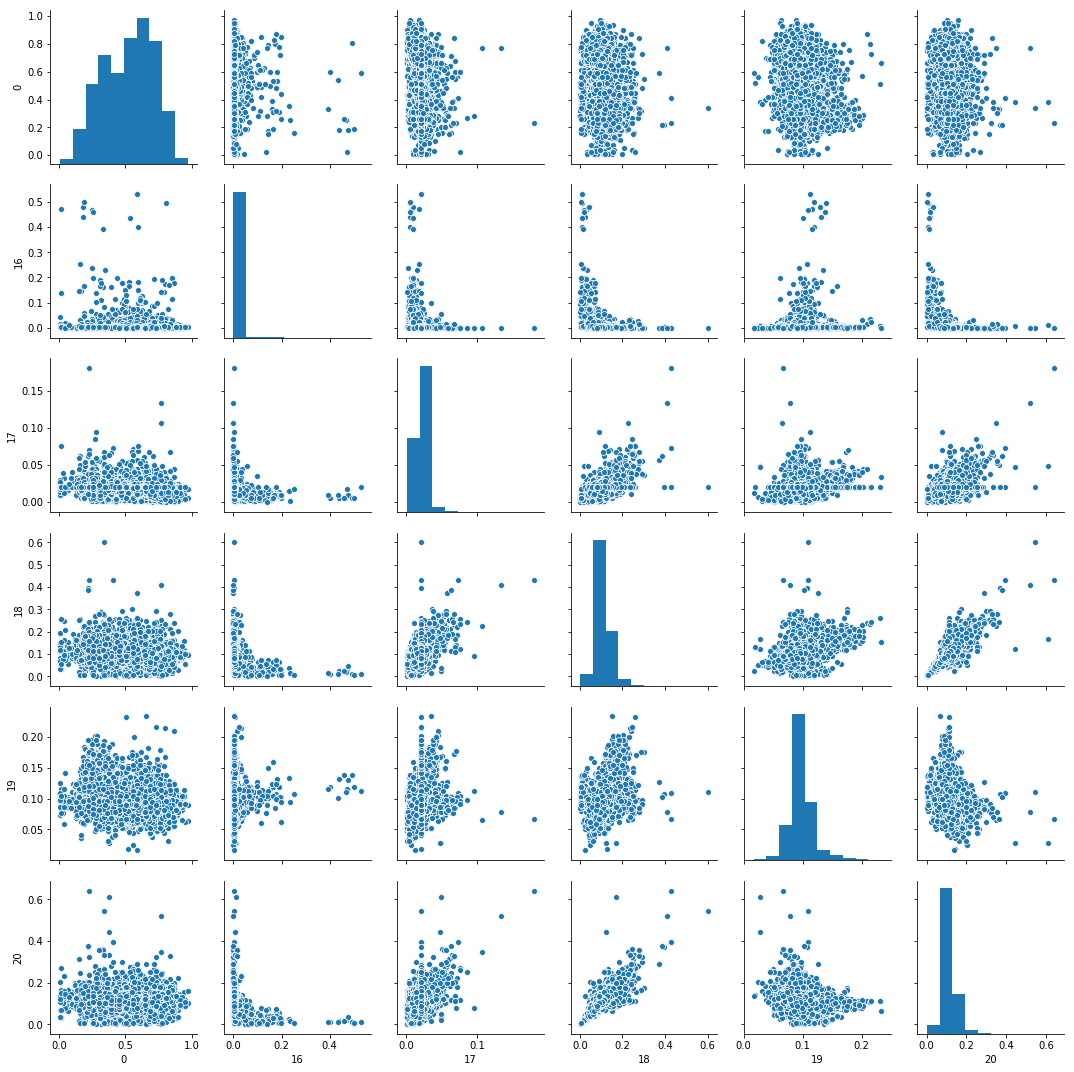

In [154]:
import seaborn as sns
sns.pairplot(data=X.iloc[: , [0, 16, 17, 18, 19, 20]])

In [6]:
import warnings
warnings.resetwarnings()

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

explained variance ratio (first two components): [0.11645293 0.07699951]
explained variance ratio (first two components): [0.11396903 0.04915613]


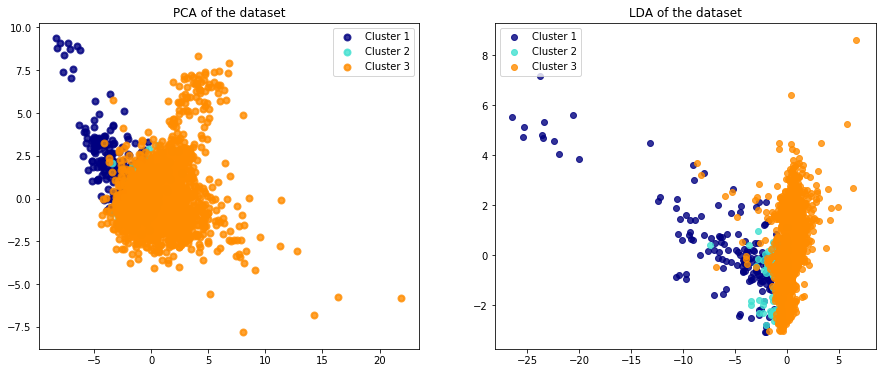

In [8]:
# dimensionality reduction with PCA
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# models
ipca = IncrementalPCA(n_components=2, batch_size=10)
X_ipca = ipca.fit_transform(X)

pca = PCA(n_components=2)
X_r_f = pca.fit(X)
X_r = pca.transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))
print('explained variance ratio (first two components): %s'
      % str(ipca.explained_variance_ratio_))

# plot
colors = ['navy', 'turquoise', 'darkorange']
target_names = ['Cluster 1', 'Cluster 2', 'Cluster 3']
lw = 2

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
for color, i, target_name in zip(colors, [1, 2, 3], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of the dataset')

plt.subplot(1, 2, 2)
for color, i, target_name in zip(colors, [1, 2, 3], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of the dataset')

plt.show()

In [9]:
# explained variance ratio
X_r_f.explained_variance_ratio_

array([0.11645293, 0.07699951])

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7200 samples in 0.057s...
[t-SNE] Computed neighbors for 7200 samples in 1.494s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7200
[t-SNE] Computed conditional probabilities for sample 2000 / 7200
[t-SNE] Computed conditional probabilities for sample 3000 / 7200
[t-SNE] Computed conditional probabilities for sample 4000 / 7200
[t-SNE] Computed conditional probabilities for sample 5000 / 7200
[t-SNE] Computed conditional probabilities for sample 6000 / 7200
[t-SNE] Computed conditional probabilities for sample 7000 / 7200
[t-SNE] Computed conditional probabilities for sample 7200 / 7200
[t-SNE] Mean sigma: 0.124540


/Users/Me/anaconda3/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.700417
[t-SNE] KL divergence after 300 iterations: 3.416885
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7200 samples in 0.062s...
[t-SNE] Computed neighbors for 7200 samples in 1.932s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7200
[t-SNE] Computed conditional probabilities for sample 2000 / 7200
[t-SNE] Computed conditional probabilities for sample 3000 / 7200
[t-SNE] Computed conditional probabilities for sample 4000 / 7200
[t-SNE] Computed conditional probabilities for sample 5000 / 7200
[t-SNE] Computed conditional probabilities for sample 6000 / 7200
[t-SNE] Computed conditional probabilities for sample 7000 / 7200
[t-SNE] Computed conditional probabilities for sample 7200 / 7200
[t-SNE] Mean sigma: 0.450081


/Users/Me/anaconda3/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.447670
[t-SNE] KL divergence after 300 iterations: 1.982839


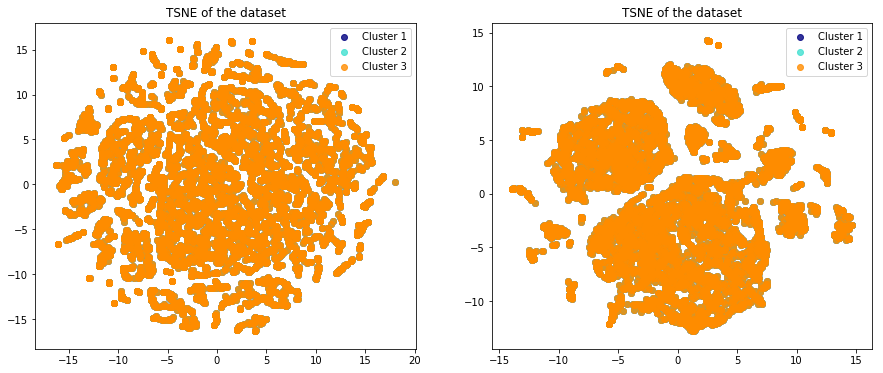

In [243]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=300)
X_tsne = tsne.fit_transform(X)

tsne_2 = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_tsne_2 = tsne_2.fit_transform(X)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
for color, i, target_name in zip(colors, [1, 2, 3], target_names):
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=.8, color=color, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('TSNE of the dataset')

plt.subplot(1, 2, 2)
for color, i, target_name in zip(colors, [1, 2, 3], target_names):
    plt.scatter(X_tsne_2[:, 0], X_tsne_2[:, 1], alpha=.8, color=color, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('TSNE of the dataset')

plt.show()